# HW 2 question 1 (set covering ant clony)
## Amirali Amini 610399102



The Ant Colony Optimization (ACO) algorithm is a metaheuristic inspired by the behavior of ants searching for the shortest path between their colony and a food source. This algorithm works by simulating the behavior of ants in a colony as they move and deposit pheromones to mark the paths they have taken. Pheromones attract other ants to follow the same path, and the more ants that traverse a path, the stronger the pheromone trail becomes.

In the context of optimization problems, the algorithm uses a similar approach to find the optimal solution by modeling the problem as a graph, where each node represents a candidate solution, and the edges represent the cost or fitness of moving from one solution to another. Ants then move through the graph, depositing pheromones on the edges they traverse, and the pheromones evaporate over time, allowing the algorithm to explore new solutions.

This algorithm is particularly effective for solving combinatorial optimization problems, such as the Traveling Salesman Problem, where the goal is to find the shortest route that visits a set of cities and returns to the starting point.


### Objective:
The overall goal of this problem is to have a set of subsets, each with a cost, and we want to cover the entire main set with the minimum cost.


### Method:
My idea is to operate exactly like TCP and to correspond this problem to that one in some way.

Now, the way I correspond it is as follows:


### General Analysis

I consider each subset as a node and assume that the graph created with these subsets is directed.

Now, the incoming edge to each node has a weight equal to the cost of that node. For example, if a node has a cost of 10 and has 100 incoming edges, the weight of all those 100 edges is 10.

Our graph is also completely bidirectional.

We construct our path by continuously selecting nodes until the sum of the selected nodes forms the main set.

In this way, we can say that the selection of all the nodes we choose must create a member set.

Since all incoming edges to a node have the same weight, I did not create a weighted graph. Instead, I assigned the same cost to each node, and if that node is in my path, I add its cost to the fitness based on the weight of the path.

The rest is similar to the TSP; only the parameters are different!

That's it.

By the way, I also tested that if a node I want to add contributes more members to our path (for example, a node with ten members adds zero to the count we want to reach, while a node with three members adds three), I directly impacted the selection probability of the nodes, and everything broke down even though it logically should have improved! I don't know why!!!!

Overall, it was very similar to TSP; that's it for now.


In [402]:
import random
import numpy as np
from math import sqrt,ceil


#### __init__
In this function, I take all the inputs except for the file we are reading.

By all inputs, I mean all the parameters.

### inp
#### inp() 
In this function, I take inputs manually.
#### inpArray() 
In this function, I take inputs as an array to make it easier to test my code.
#### inpFile() 
In this function, I read the test case inputs from a file.


#### calcFitness
In this function, I calculate the fitness of a path.

#### pheromoneAdder
In this function, I add the fitness of a path as pheromone to all nodes.

#### newIteration
In this function, I progress through an iteration using the node selector, new iteration, pheromone adder, and pheromone evaporation functions.

#### wayCreator
This function generates a good path using the node selector.

#### nodeSelector
In this function, I assign a probability to each node that is not in the path, which depends on the pheromone on it, the inverse of its cost, raised to the power of alpha, and its cost raised to the power of beta.

Using these probabilities, I select one node to add to the path.

#### evapPheromone
This function evaporates all the pheromones we have by a certain percentage after each iteration is generated, with the


In [403]:
class antClony:
    def __init__(self  , pSize , n=1 , m=1, alpha = 1 , beta = 1 ,evap = 0.1 , phermone = 0.5) -> None:
        self.populationSize = pSize
        self.subsetNumber = m 
        self.setSize = n
        self.subsets = [[] for _ in range (m)]
        self.costs = []
        self.pheromoneArray = [phermone]*m
        self.antsFitness = [0]*pSize
        self.population = [[i for i in range (m)] for _ in range(pSize) ]
        self.alpha  = alpha
        self.beta  = beta
        self.evap = evap
        self.phermone = phermone


    def inp(self):
        for cost in map(int ,input().split()):
            self.costs.append( cost )

        for element in range (self.setSize):
            input()
            sets = list(map(int ,input().split()))
            for set in sets:
                self.subsets[set-1].append(element)

                
    def inpFile(self , inputFile):
        file = open(inputFile).read().replace('\n', '')
        numbers = list(map(int,file.split()))
        self.setSize,self.subsetNumber = numbers[:2]
        m =self.subsetNumber
        self.subsets = [[] for _ in range (m)]
        self.costs = []
        self.pheromoneArray = [self.phermone]*m
        self.population = [[random.sample(range(m) , random.randint(1,m) )  ] for _ in range(self.populationSize) ]

        


        self.costs = numbers[2:self.subsetNumber+2]
        index  =self.subsetNumber+2
        counter = 0 
        while(counter < self.setSize ):
            size = numbers[index]
            index+=1
            ls = numbers[index:index+size]
            index+=size

            for element in ls :
                self.subsets[element-1].append(counter)
            counter+=1




    def inpArray(self , costs , nodes):
        self.costs += costs 

        for element in range (self.setSize):
            sets = nodes[element]
            for set in sets:
                self.subsets[set-1].append(element)


    def calcFitness(self , ant):
        fitness = 0
        for node in ant : 
            fitness+= self.costs[node]
        return 1/fitness
    

    def newItration(self):
        for ant in range(self.populationSize):
            self.population[ant]=self.wayCreator()
            self.antsFitness [ant] = self.calcFitness(self.population[ant])
            self.phormoneAdder( self.population[ant])
        self.evapPhermones()



    def phormoneAdder(self , ant , adder = lambda x : x):
        ant_fitness = self.calcFitness(ant)
        for i in ant:
             self.pheromoneArray[i] += adder(ant_fitness)
            


    def evapPhermones(self , evaper = lambda x,p : x*(1-p)):
        for i in range (self.subsetNumber):
            new_phormone = evaper (self.pheromoneArray[i] ,  self.evap)
            self.pheromoneArray[i] = new_phormone



    def wayCreator(self):
        fisibleArray = [0] * self.setSize
        seenNodes = [False]*self.subsetNumber
        way = []
        for idx in range ( self.subsetNumber) :
            way.append(self.nodeSelector(seenNodes,fisibleArray))
            for number in self.subsets[way[-1]]:
                fisibleArray[number]=1
            if (sum(fisibleArray)==self.setSize):return way
        return way



    def nodeSelector(self , neighbors ,fisibleArray ):
        includedNodeIndex = []
        probArray = []
        for nodeIndex in range(self.subsetNumber):
            if (not neighbors[nodeIndex]) :
                includedNodeIndex.append(nodeIndex)
                probArray.append(((self.pheromoneArray[nodeIndex])** self.alpha )* ((1/self.costs[nodeIndex])**self.beta))
        selectedNode = random.choices(includedNodeIndex, weights=probArray)[0]
        neighbors[selectedNode]  =True
        return selectedNode



    def prnt(self):
        print ('pheromoneArray : ' ,self.pheromoneArray)
        print ()

        print ('fitness_arr : ' , self.antsFitness )
        print ()
        print ('fitness_arr : ' , self.antsFitness )
        print ()
        print ('population : ' , self.population )
        print ()
        print ('cost_array : ' , self.costs )
        print ()
        print ('subsets : ' , self.subsets )
        print ()


In [404]:
test = antClony(pSize= 10 , m = 4, n = 4 , alpha=0.5 , beta=1)
test.inpArray([1,2,3,20] , [[1,2] , [2,3] , [1,3] , [4]])
test.prnt()
for _ in range (100):
    test.newItration()
    print(min(list(map(lambda x : 1/x , test.antsFitness))))
    # test.prnt()
    # print(test.pheromoneArray)
print(list(map(lambda x : 1/x , test.antsFitness)))


pheromoneArray :  [0.5, 0.5, 0.5, 0.5]

fitness_arr :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

fitness_arr :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

population :  [[0, 1, 2, 3], [0, 1, 2, 3], [0, 1, 2, 3], [0, 1, 2, 3], [0, 1, 2, 3], [0, 1, 2, 3], [0, 1, 2, 3], [0, 1, 2, 3], [0, 1, 2, 3], [0, 1, 2, 3]]

cost_array :  [1, 2, 3, 20]

subsets :  [[0, 2], [0, 1], [1, 2], [3]]

26.0
23.0
23.0
23.0
23.0
26.0
23.0
23.0
23.0
24.0
23.0
23.0
23.0
23.0
23.0
24.0
23.0
26.0
23.0
26.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
26.0
23.0
23.0
23.0
23.0
24.0
23.0
26.0
23.0
24.0
23.0
26.0
24.0
23.0
24.0
23.0
23.0
24.0
26.0
23.0
26.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
26.0
24.0
26.0
24.0
24.0
23.0
23.0
23.0
26.0
23.0
23.0
23.0
26.0
23.0
23.0
24.0
23.0
23.0
23.0
23.0
23.0
24.0
23.0
23.0
24.0
23.0
24.0
23.0
23.0
23.0
23.0
23.0
24.0
23.0
23.0
24.0
23.0
23.0
23.0
23.0
[26.0, 26.0, 26.0, 26.0, 24.0, 26.0, 26.0, 26.0, 23.0, 26.0]


In [420]:
scp41 = antClony(10 , alpha=15, beta=1/2 , evap=0.15 , phermone=0.01)
scp41.inpFile('scp41.txt')


I experimented a lot with this test case; it took me about a day, and it wouldn't go below 7000. I tried everything that came to mind, from alpha being one thousandth to alpha being one hundred, and the same for beta. I significantly increased and decreased the evaporation rate, and I changed the population a lot, but in the end, this was the best result I could achieve.


In [421]:
bestAns = 10000
repeat = 0
itration = 0
y=[]
x=[]
while (bestAns> 500 and repeat <40 ):
    scp41.newItration()
    best =  min(list(map(lambda x : 1/x , scp41.antsFitness)))
    print( 'itration: ' , itration, 'fitness : ' ,best)
    if (bestAns> best ): 
        bestAns=best
        repeat = 0
        bestCost = max(scp41.antsFitness)
        index = scp41.antsFitness.index(bestCost)
        bestAnsArray = scp41.population[index]
    y.append(bestAns)
    x.append(itration)
    repeat+=1
    itration+=1
print('the best fitness is : ' , bestAns ," => ",bestAnsArray)

itration:  0 fitness :  7203.999999999999
itration:  1 fitness :  8198.0
itration:  2 fitness :  4777.0
itration:  3 fitness :  1440.0
itration:  4 fitness :  1171.0
itration:  5 fitness :  1114.0
itration:  6 fitness :  948.0000000000001
itration:  7 fitness :  986.0
itration:  8 fitness :  935.0
itration:  9 fitness :  910.0
itration:  10 fitness :  829.0
itration:  11 fitness :  789.0
itration:  12 fitness :  772.9999999999999
itration:  13 fitness :  746.0
itration:  14 fitness :  705.0
itration:  15 fitness :  719.0
itration:  16 fitness :  693.0
itration:  17 fitness :  707.0
itration:  18 fitness :  670.0
itration:  19 fitness :  678.0
itration:  20 fitness :  671.0
itration:  21 fitness :  647.0
itration:  22 fitness :  668.0
itration:  23 fitness :  649.0
itration:  24 fitness :  653.0
itration:  25 fitness :  640.0
itration:  26 fitness :  641.0
itration:  27 fitness :  653.0
itration:  28 fitness :  630.0
itration:  29 fitness :  632.0
itration:  30 fitness :  631.0
itration

In [422]:
print (x)
print (y)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139]
[7203.999999999999, 7203.999999999999, 4777.0, 1440.0, 1171.0, 1114.0, 948.0000000000001, 948.0000000000001, 935.0, 910.0, 829.0, 789.0, 772.9999999999999, 746.0, 705.0, 705.0, 693.0, 693.0, 670.0, 670.0, 670.0, 647.0, 647.0, 647.0, 647.0, 640.0, 640.0, 640.0, 630.0, 630.0, 630.0, 614.0, 614.0, 605.0, 605.0, 605.0, 605.0, 597.0, 597.0, 597.0, 581.0, 574.0, 574.0, 574.0, 574.0, 574.0, 564.0, 564.0, 564.0, 5

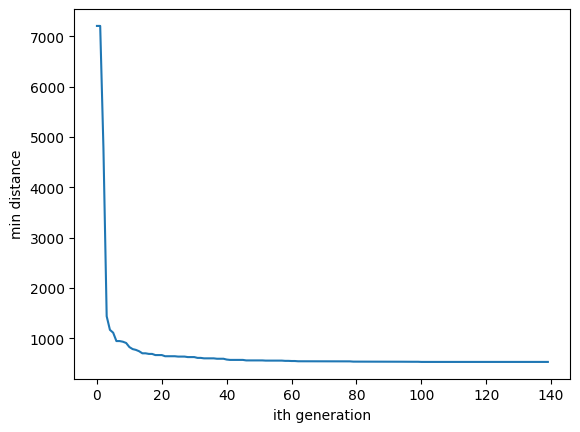

In [423]:
import matplotlib.pyplot as plt

plt.plot(x, y)
plt.xlabel("ith generation")
plt.ylabel("min distance")
plt.show()

For this one, I first used the same parameters from the previous test, and then I changed their values again, only to find that the previous ones were better.

Overall, I realized that the more exploration there is in this problem, the better the results. However, it's not the case that we can ignore exploitation completely.

It’s likely that our search space is complex.

With these parameters, I got very close to a solution, and I think they are good parameters.


In [447]:
scp52 = antClony(10 , alpha=15, beta=1/2 , evap=0.15 , phermone=0.01)
scp52.inpFile('scp52.txt')

In [448]:
bestAns = 100000
repeat = 0
itration = 0
y=[]
x=[]
while (bestAns> 360 and repeat <40 ):
    scp52.newItration()
    best =  min(list(map(lambda x : 1/x , scp52.antsFitness))) 
    print( 'itration: ' , itration, 'fitness : ' ,best)
    if (bestAns> best ): 
        bestAns=best
        repeat = 0
        bestCost = max(scp52.antsFitness)
        index = scp52.antsFitness.index(bestCost)
        bestAnsArray = scp52.population[index]
    y.append(bestAns)
    x.append(itration)
    repeat+=1
    itration+=1
print('the best fitness is : ' , bestAns ," => ",bestAnsArray)

itration:  0 fitness :  8419.0
itration:  1 fitness :  7401.000000000001
itration:  2 fitness :  4085.0
itration:  3 fitness :  2467.0
itration:  4 fitness :  2797.0
itration:  5 fitness :  1984.0
itration:  6 fitness :  1628.0
itration:  7 fitness :  1420.0
itration:  8 fitness :  1355.0
itration:  9 fitness :  1211.0
itration:  10 fitness :  1000.0
itration:  11 fitness :  908.0
itration:  12 fitness :  850.0
itration:  13 fitness :  816.0
itration:  14 fitness :  757.0000000000001
itration:  15 fitness :  661.0
itration:  16 fitness :  648.0
itration:  17 fitness :  612.0
itration:  18 fitness :  587.0
itration:  19 fitness :  588.0
itration:  20 fitness :  585.0
itration:  21 fitness :  573.0
itration:  22 fitness :  563.0
itration:  23 fitness :  557.0
itration:  24 fitness :  559.0
itration:  25 fitness :  535.0
itration:  26 fitness :  524.0
itration:  27 fitness :  519.0
itration:  28 fitness :  526.0
itration:  29 fitness :  531.0
itration:  30 fitness :  523.0
itration:  31 f

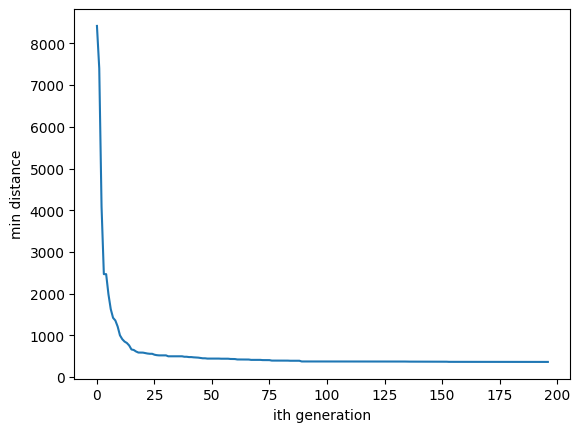

In [449]:
import matplotlib.pyplot as plt

plt.plot(x, y)
plt.xlabel("ith generation")
plt.ylabel("min distance")
plt.show()

In this one, changing the parameters improved the results significantly, and I reached a solution much faster. Overall, I think it was a smaller test case because everything progressed much more quickly!


In [436]:
scp62 = antClony(10 , alpha=5, beta=1 , evap=0.15 , phermone=0.01)
scp62.inpFile('scp62.txt')

In [437]:
bestAns = 2000
repeat = 0
itration = 0
y=[]
x=[]
while (bestAns> 200 and repeat <40 ):
    scp62.newItration()
    best =  min(list(map(lambda x : 1/x , scp62.antsFitness)))
    print( 'itration: ' , itration, 'fitness : ' ,best)
    if (bestAns> best ): 
        bestAns=best
        repeat = 0
        bestCost = max(scp62.antsFitness)
        index = scp62.antsFitness.index(bestCost)
        bestAnsArray = scp62.population[index]
    y.append(bestAns)
    x.append(itration)
    repeat+=1
    itration+=1
print('the best fitness is : ' , bestAns ," => ",bestAnsArray)

itration:  0 fitness :  1331.0
itration:  1 fitness :  847.0
itration:  2 fitness :  383.0
itration:  3 fitness :  296.0
itration:  4 fitness :  249.00000000000003
itration:  5 fitness :  245.99999999999997
itration:  6 fitness :  252.0
itration:  7 fitness :  232.0
itration:  8 fitness :  244.0
itration:  9 fitness :  224.0
itration:  10 fitness :  239.00000000000003
itration:  11 fitness :  239.00000000000003
itration:  12 fitness :  233.99999999999997
itration:  13 fitness :  230.0
itration:  14 fitness :  233.0
itration:  15 fitness :  233.0
itration:  16 fitness :  239.00000000000003
itration:  17 fitness :  230.0
itration:  18 fitness :  237.00000000000003
itration:  19 fitness :  238.0
itration:  20 fitness :  237.00000000000003
itration:  21 fitness :  224.0
itration:  22 fitness :  237.00000000000003
itration:  23 fitness :  228.0
itration:  24 fitness :  230.0
itration:  25 fitness :  235.0
itration:  26 fitness :  219.0
itration:  27 fitness :  228.0
itration:  28 fitness : 

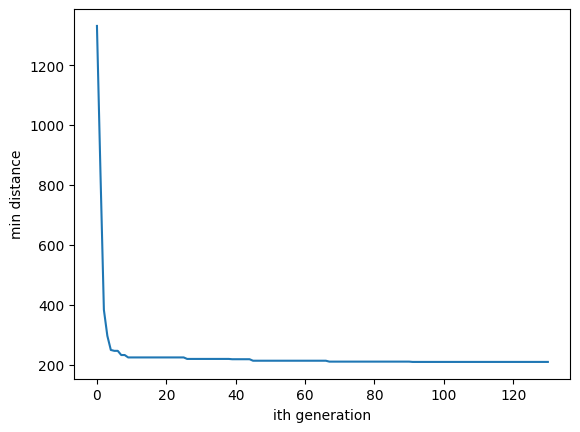

In [438]:
import matplotlib.pyplot as plt

plt.plot(x, y)
plt.xlabel("ith generation")
plt.ylabel("min distance")
plt.show()